# 스타틴 복용의 당뇨발생 여부

### 라이브러리 불러오기

In [187]:
import pymssql as mssql
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
import gc
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import warnings #5
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.font_manager as fm
font_location = "/usr/share/fonts/NanumBarunGothicBold.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

### MS-SQL에서 데이터 가져오기

In [188]:
db = mssql.connect(db = mssql.connect(host = '*.*.*.*' , user ='****' , password = '****' , database = '****'))
raw_data = pd.read_sql_query("select * from statin_dataset_v1",db)

anaysis_data = raw_data[['HEIGHT', 'WEIGHT', 'BP_HIGH','BP_LWST', 'BLDS','TOT_CHOLE', 'HMG', 'SGOT_AST', 
                         'SGPT_ALT', 'GAMMA_GTP', 'AGE_GROUP', 'CTRB_PT_TYPE_CD','OLIG_PROTE_CD',
                         'SMK_STAT_TYPE_RSPS_CD','본인부담금','보험자부담금','총액' ,'SEX', '환자구분']]
db.close()
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',20)
display(anaysis_data)

,HEIGHT,WEIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,HMG,SGOT_AST,SGPT_ALT,GAMMA_GTP,AGE_GROUP,CTRB_PT_TYPE_CD,OLIG_PROTE_CD,SMK_STAT_TYPE_RSPS_CD,본인부담금,보험자부담금,총액,SEX,환자구분
0,174.0,65.0,130.0,90.0,85.0,228.0,13.599609,21.0,19.0,22.0,9,9,1,,14155,36251,50406,1,0
1,153.0,53.0,124.0,69.0,113.0,220.0,13.000000,14.0,20.0,32.0,15,3,1,1,5981,19784,25765,2,0
2,156.0,61.0,150.0,90.0,67.0,208.0,13.398438,18.0,12.0,18.0,15,8,1,1,4379,15010,19389,2,0
3,152.0,60.0,136.0,74.0,92.0,240.0,13.398438,25.0,20.0,25.0,14,5,1,1,9107,25047,34155,2,1
4,157.0,62.0,140.0,89.0,91.0,231.0,13.199219,17.0,14.0,38.0,15,9,1,1,5743,26150,31910,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29385,165.0,57.0,127.0,74.0,122.0,257.0,12.298828,17.0,14.0,27.0,12,10,1,1,10271,22994,33265,2,1
29386,169.0,90.0,140.0,70.0,97.0,255.0,15.500000,40.0,39.0,91.0,12,7,2,3,10157,20348,30505,1,1
29387,154.0,68.0,126.0,68.0,99.0,259.0,13.099609,16.0,13.0,10.0,11,1,1,1,6045,14131,20177,2,0
29388,146.0,53.0,139.0,85.0,105.0,212.0,12.798828,20.0,16.0,16.0,14,8,1,1,6975,21632,28607,2,0


### 성별 >> 명목형 변수로 변환

In [250]:
# 0:남자 1:여자
dummy_sex = pd.get_dummies(anaysis_data['SEX'], prefix='sex', drop_first=True)
dummy_data = pd.concat((anaysis_data, dummy_sex), axis=1)
dummy_data = dummy_data[['HEIGHT', 'WEIGHT', 'BP_HIGH','BP_LWST', 'BLDS','TOT_CHOLE', 'HMG', 'SGOT_AST', 
                         'SGPT_ALT', 'GAMMA_GTP','AGE_GROUP', 'CTRB_PT_TYPE_CD','OLIG_PROTE_CD',
                         '본인부담금','보험자부담금','총액','sex_2', '환자구분']]
dummy_data = dummy_data.rename(columns={'sex_2':'SEX'})
display(dummy_data)

,HEIGHT,WEIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,HMG,SGOT_AST,SGPT_ALT,GAMMA_GTP,AGE_GROUP,CTRB_PT_TYPE_CD,OLIG_PROTE_CD,본인부담금,보험자부담금,총액,SEX,환자구분
0,174.0,65.0,130.0,90.0,85.0,228.0,13.599609,21.0,19.0,22.0,9,9,1,14155,36251,50406,0,0
1,153.0,53.0,124.0,69.0,113.0,220.0,13.000000,14.0,20.0,32.0,15,3,1,5981,19784,25765,1,0
2,156.0,61.0,150.0,90.0,67.0,208.0,13.398438,18.0,12.0,18.0,15,8,1,4379,15010,19389,1,0
3,152.0,60.0,136.0,74.0,92.0,240.0,13.398438,25.0,20.0,25.0,14,5,1,9107,25047,34155,1,1
4,157.0,62.0,140.0,89.0,91.0,231.0,13.199219,17.0,14.0,38.0,15,9,1,5743,26150,31910,1,1
5,179.0,79.0,140.0,90.0,93.0,202.0,15.798828,19.0,9.0,38.0,10,8,1,5864,14567,20445,0,0
6,153.0,63.0,150.0,100.0,106.0,283.0,12.699219,20.0,15.0,19.0,14,10,1,9963,20740,30703,1,1
7,160.0,75.0,135.0,85.0,101.0,261.0,13.599609,21.0,28.0,33.0,16,2,1,5106,14325,19498,0,1
8,165.0,70.0,110.0,70.0,111.0,249.0,15.798828,31.0,41.0,36.0,11,4,1,5564,13443,19008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### 결측치있는 행 제거

In [190]:
anaysis_data_dropnull = dummy_data.dropna(axis=0)

In [191]:
#anaysis_data_dropnull[anaysis_data_dropnull['OLIG_PROTE_CD']=='']='1'
anaysis_data_dropnull.AGE_GROUP.value_counts()

11    6366
13    5074
12    4643
10    4119
14    2802
      ... 
16     628
8      558
17     220
18      43
7       30
Name: AGE_GROUP, Length: 12, dtype: int64

### 신장,체중 이용해서 BMI변수 추가 

In [192]:
#anaysis_data_dropnull[['HEIGHT', 'WEIGHT']] = anaysis_data_dropnull[['HEIGHT', 'WEIGHT']].astype(float)
BMI = (anaysis_data_dropnull["WEIGHT"]/(pow(anaysis_data_dropnull["HEIGHT"]/100,2)))
anaysis_data_dropnull = pd.concat((anaysis_data_dropnull,BMI), axis=1)
anaysis_data_dropnull = anaysis_data_dropnull.rename(columns={0:'BMI'})

anaysis_data_dropnull = anaysis_data_dropnull[['HEIGHT', 'WEIGHT','BMI','BP_HIGH','BP_LWST', 'BLDS',
                                               'TOT_CHOLE', 'HMG', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 
                                               'AGE_GROUP', 'CTRB_PT_TYPE_CD','OLIG_PROTE_CD',
                                               '본인부담금','보험자부담금','총액','SEX', '환자구분']]

pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',20)
display(anaysis_data_dropnull)


,HEIGHT,WEIGHT,BMI,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,HMG,SGOT_AST,SGPT_ALT,GAMMA_GTP,AGE_GROUP,CTRB_PT_TYPE_CD,OLIG_PROTE_CD,본인부담금,보험자부담금,총액,SEX,환자구분
0,174.0,65.0,21.469150,130.0,90.0,85.0,228.0,13.599609,21.0,19.0,22.0,9,9,1,14155,36251,50406,0,0
1,153.0,53.0,22.640865,124.0,69.0,113.0,220.0,13.000000,14.0,20.0,32.0,15,3,1,5981,19784,25765,1,0
2,156.0,61.0,25.065746,150.0,90.0,67.0,208.0,13.398438,18.0,12.0,18.0,15,8,1,4379,15010,19389,1,0
3,152.0,60.0,25.969529,136.0,74.0,92.0,240.0,13.398438,25.0,20.0,25.0,14,5,1,9107,25047,34155,1,1
4,157.0,62.0,25.153150,140.0,89.0,91.0,231.0,13.199219,17.0,14.0,38.0,15,9,1,5743,26150,31910,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29385,165.0,57.0,20.936639,127.0,74.0,122.0,257.0,12.298828,17.0,14.0,27.0,12,10,1,10271,22994,33265,1,1
29386,169.0,90.0,31.511502,140.0,70.0,97.0,255.0,15.500000,40.0,39.0,91.0,12,7,2,10157,20348,30505,0,1
29387,154.0,68.0,28.672626,126.0,68.0,99.0,259.0,13.099609,16.0,13.0,10.0,11,1,1,6045,14131,20177,1,0
29388,146.0,53.0,24.863952,139.0,85.0,105.0,212.0,12.798828,20.0,16.0,16.0,14,8,1,6975,21632,28607,1,0


### 데이터를 배열 형태로 바꿔줌

In [193]:
data = anaysis_data_dropnull.values
data=data.astype(np.float64)

### 환자, 대조군별 변수 히스토그램

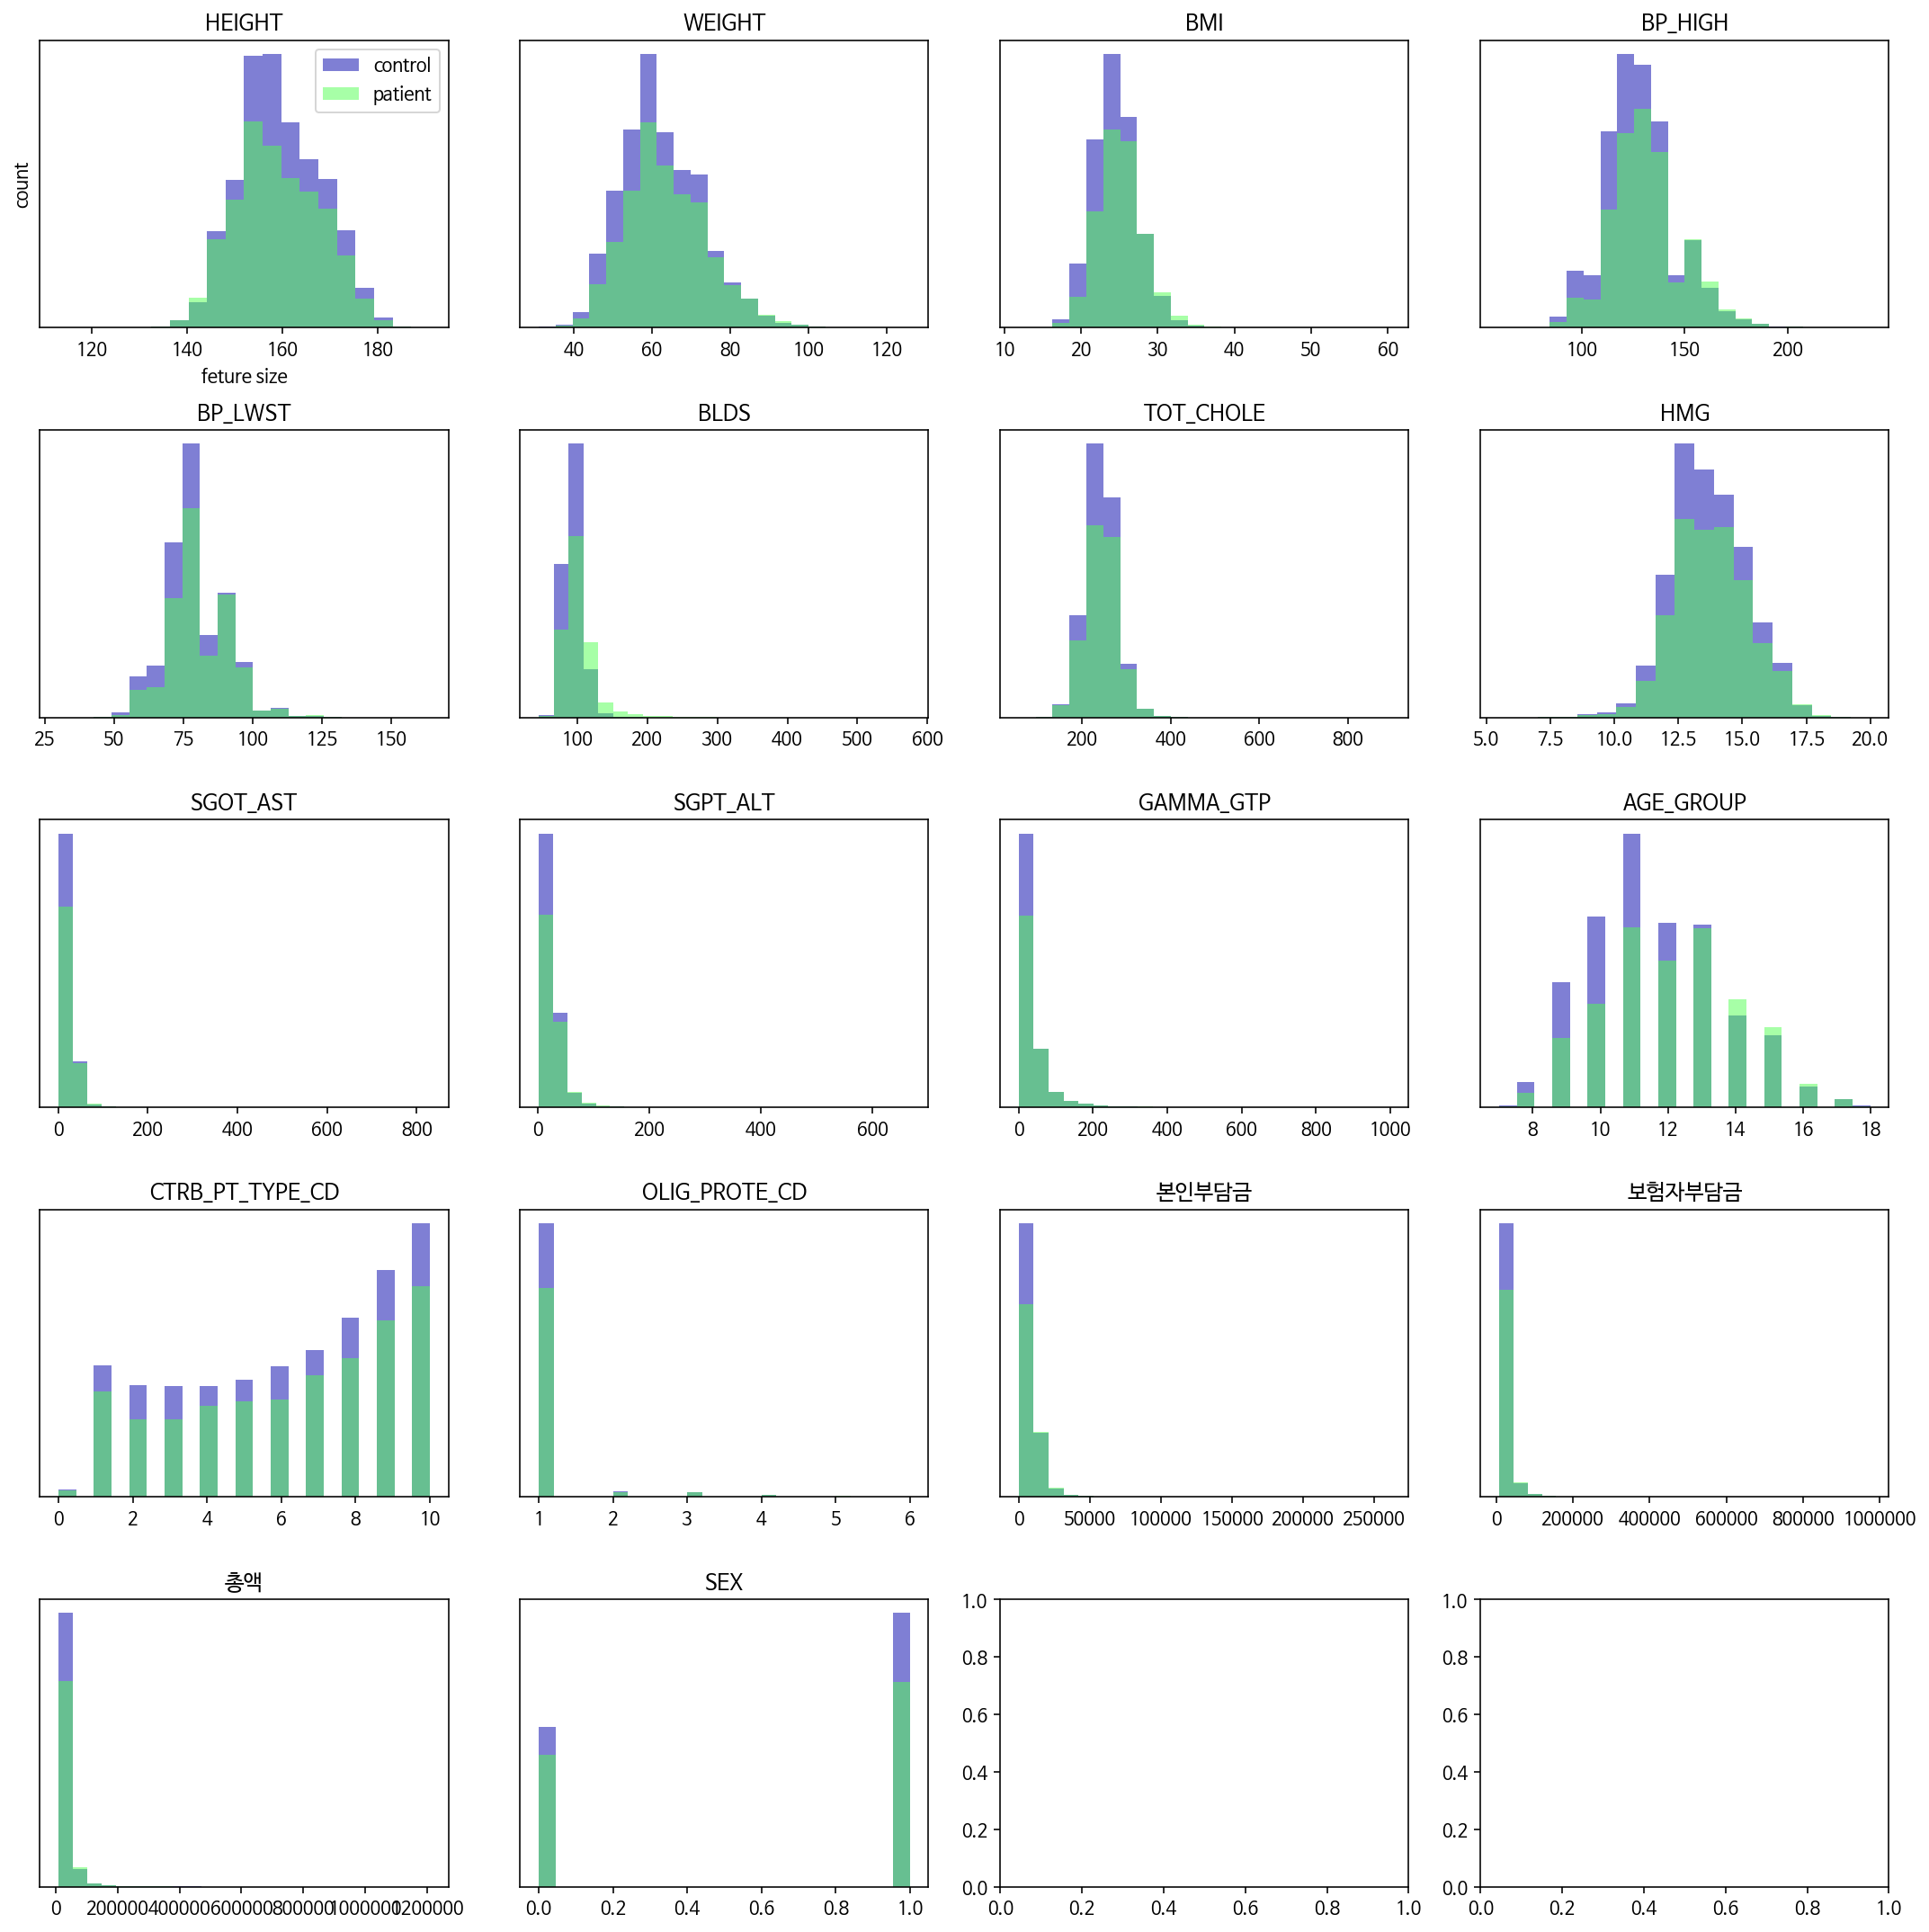

In [194]:
fig, axes = plt.subplots(5,4,figsize=(15,15))
control = data[data[0:,18]==0]
patient = data[data[0:,18]==1]
ax = axes.ravel()
for i in range(18):
    _,bins=np.histogram(data[:,i], bins='doane')
    ax[i].hist(control[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(patient[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(anaysis_data_dropnull.columns[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feture size")
ax[0].set_ylabel("count")
ax[0].legend(["control","patient"], loc="best")
fig.tight_layout()

HEIGHT
WEIGHT
BMI
BP_HIGH
BP_LWST
BLDS
TOT_CHOLE
HMG
SGOT_AST
SGPT_ALT
GAMMA_GTP
본인부담금
보험자부담금
총액


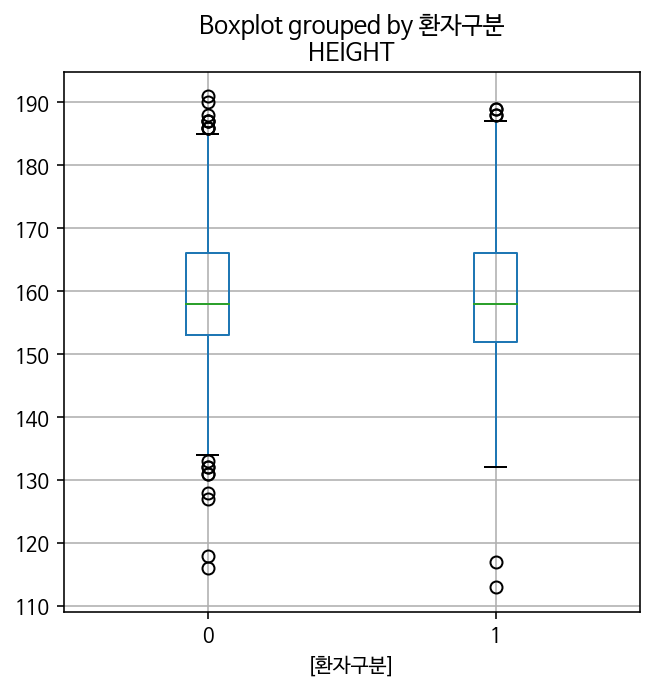

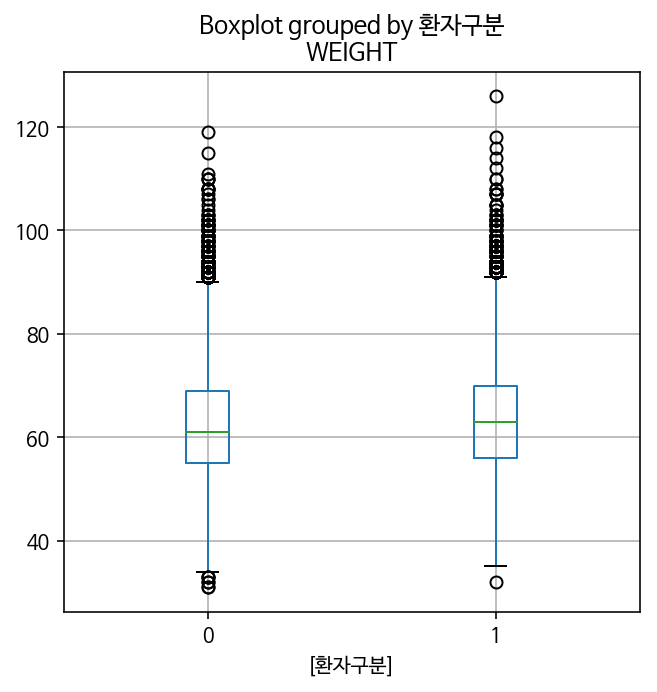

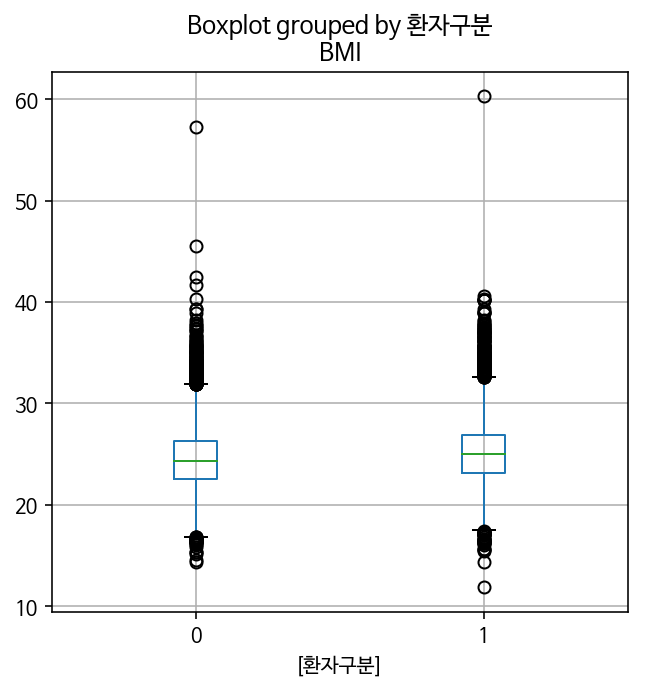

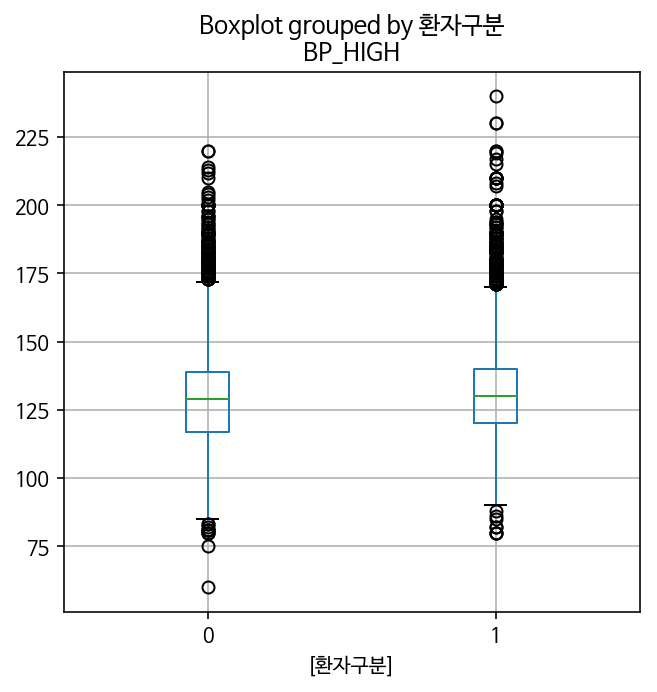

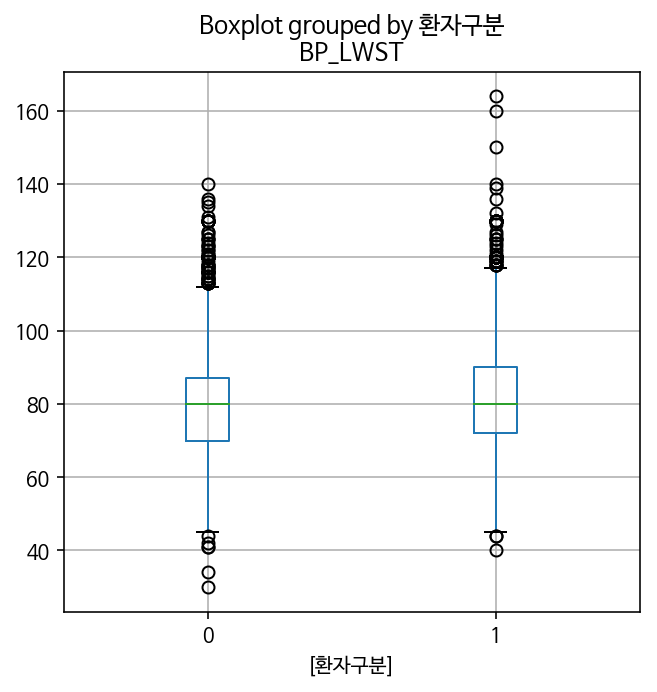

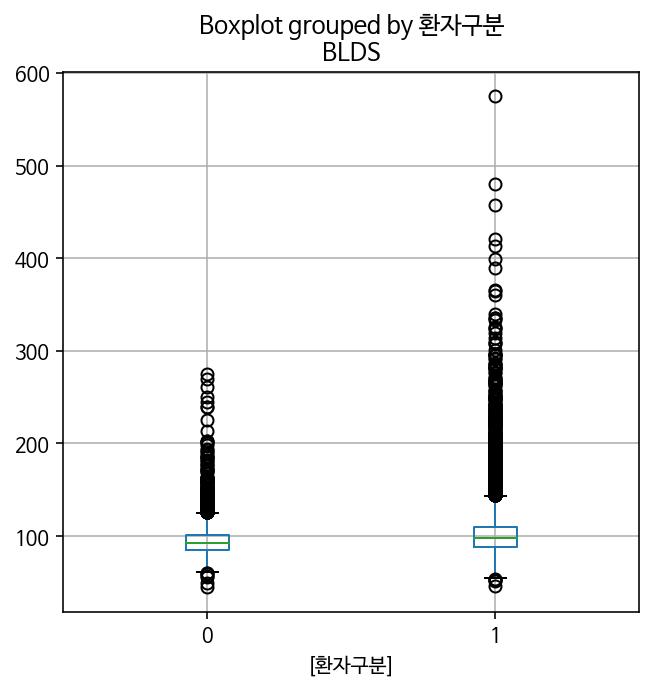

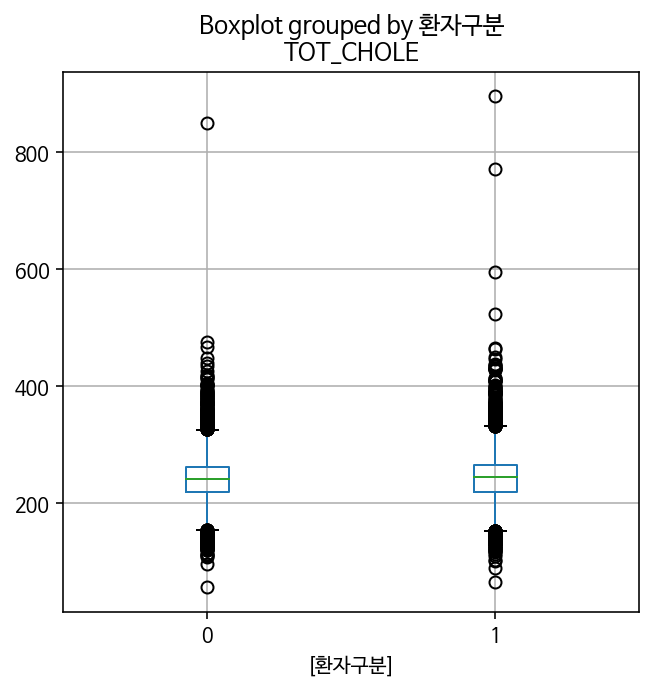

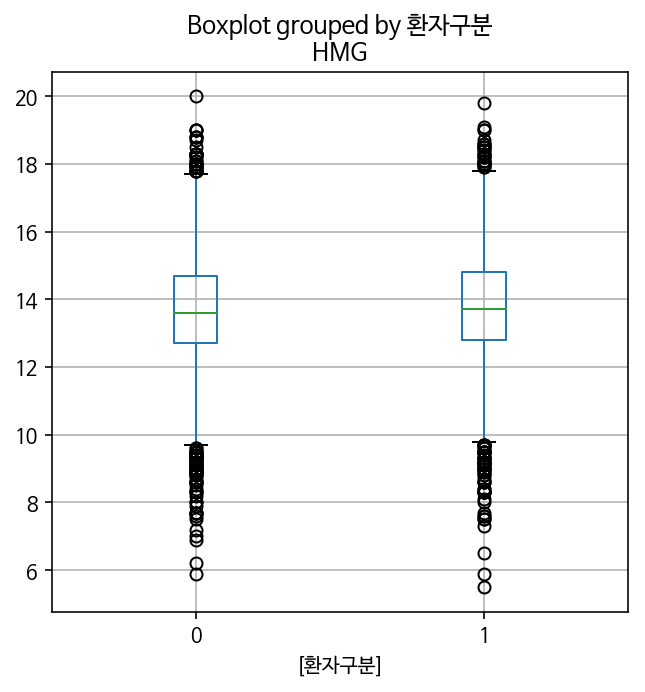

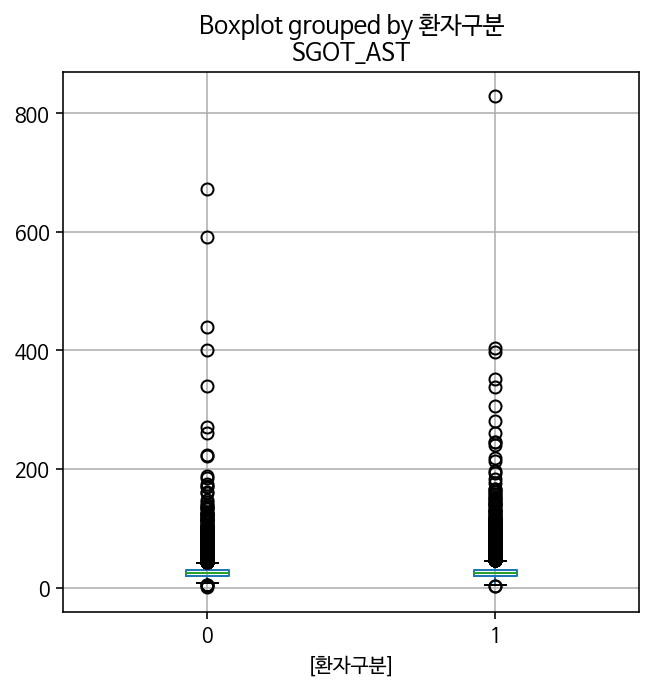

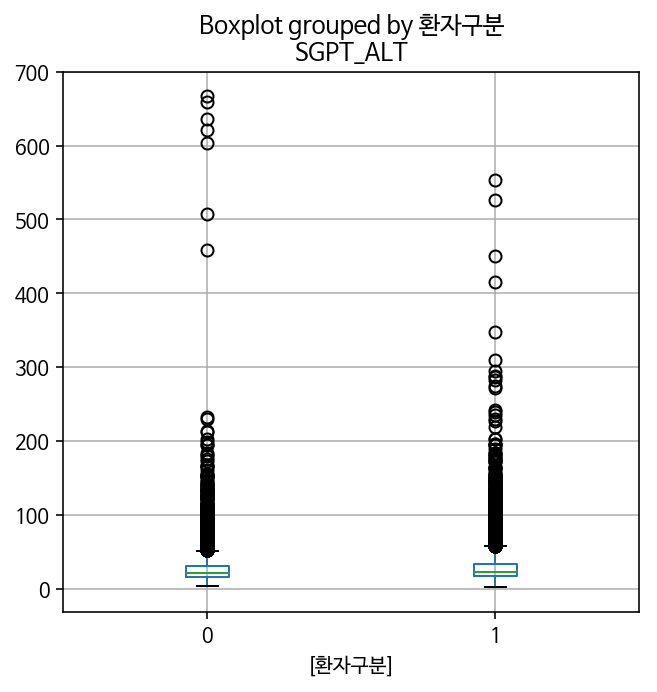

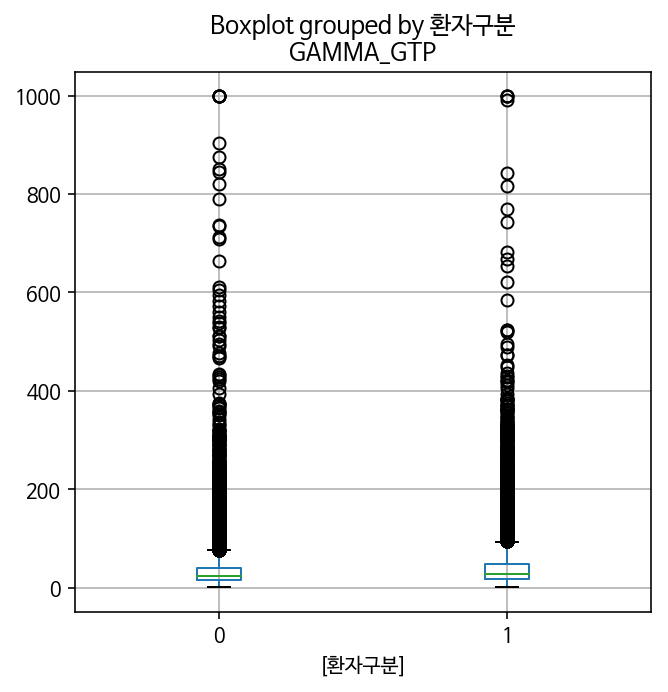

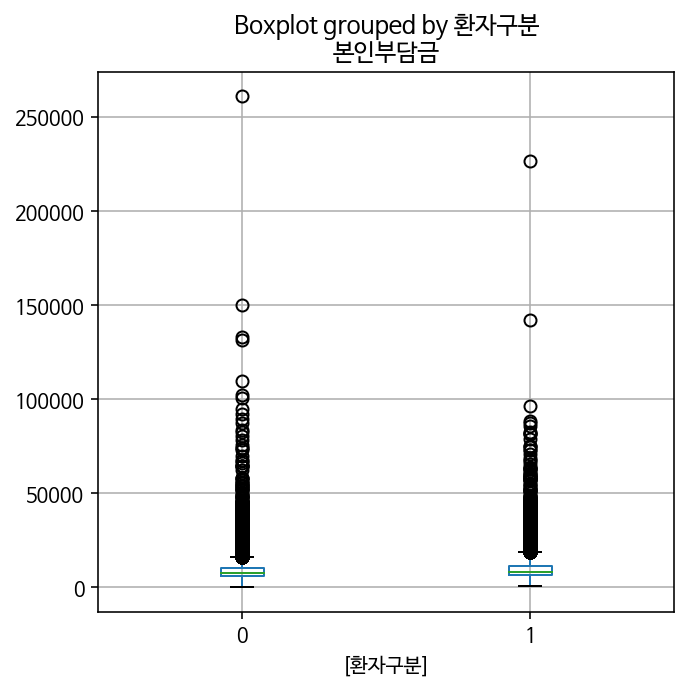

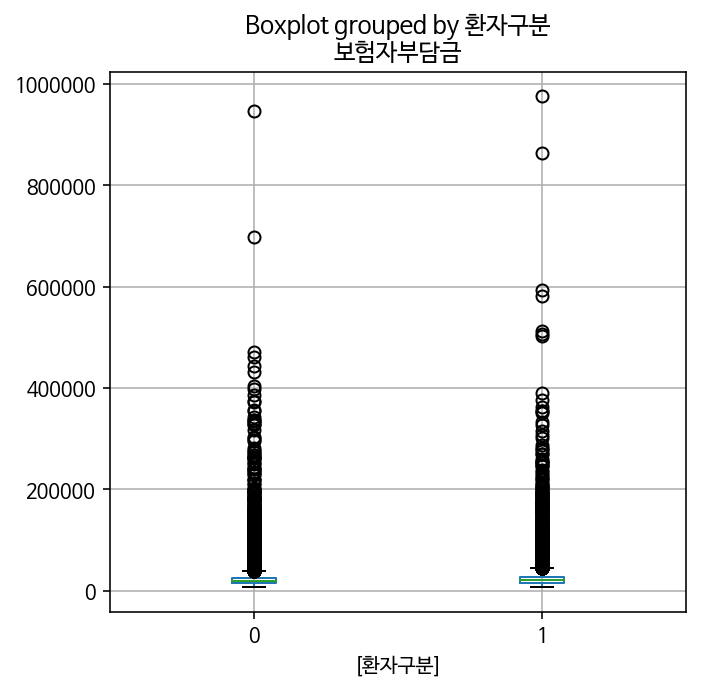

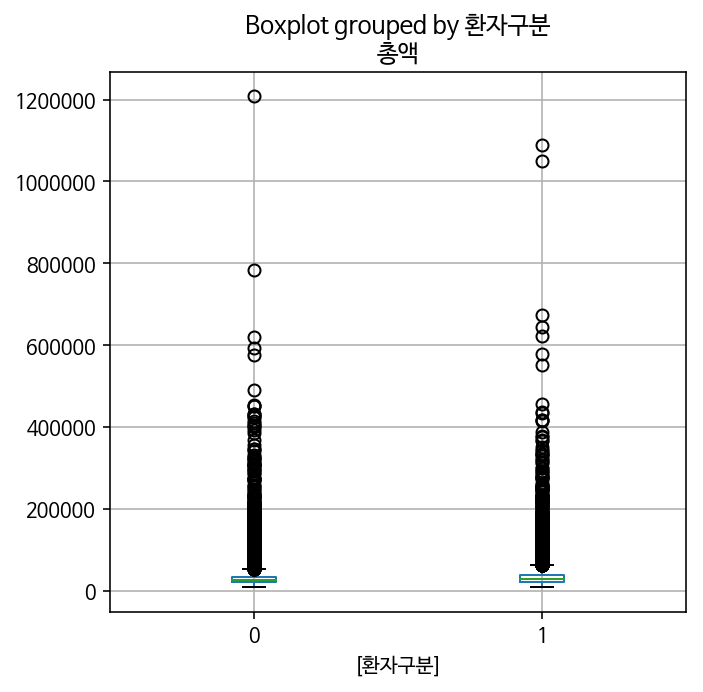

In [195]:
boxplot_dataset = ['HEIGHT', 'WEIGHT','BMI','BP_HIGH','BP_LWST', 'BLDS',
                                         'TOT_CHOLE', 'HMG', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 
                                         '본인부담금','보험자부담금','총액']
for i in boxplot_dataset:
    i=str(i)
    print(i)
    anaysis_data_dropnull[[i,'환자구분']].boxplot(vert=True, by='환자구분', figsize=(5,5))
#anaysis_data_dropnull[['총액','환자구분']].boxplot(vert=True, by='환자구분', figsize=(5,5))

###### 히스토그램을 그려보니 신장, 체중, HMG, 총액은 환자와 대조군간에 분포의 차이가 거의 없음...
###### 제외하고 분석용 데이터셋을 만든다.

In [ ]:
X = np.c_[data[:,2:7],data[:,8:16],data[:,17]]
#X = data[:,0:18]
y = data[:,18]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(type(data))

X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_test = y_test.astype(np.float64)

### Logistic Regression

In [197]:
X_train_scaled = np.c_[scale(X_train[:,0:13]),X_train[:,13]]
X_test_scaled = np.c_[scale(X_test[:,0:13]),X_test[:,13]]
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(23468, 14)
(5867, 14)


In [198]:
#0~1사이로 변수 변환
scaler=MinMaxScaler()
X_train_MM=scaler.fit_transform(X_train)
X_test_MM=scaler.fit_transform(X_test)

In [241]:
#정규화한 변수
logit = LogisticRegression(C=1000.0, random_state=0, n_jobs=-1, solver='sag', max_iter=40000)
logit.fit(X_train_scaled, y_train)
print("훈련세트 정확도 : {:.3f}".format(logit.score(X_train_scaled, y_train)))
print("테스트세트 정확도 : {:.3f}".format(logit.score(X_test_scaled, y_test)))
pred = logit.predict(X_test_scaled)
con_mat = confusion_matrix(y_test, pred)
print("--Confusion Matrix--")
print(con_mat)
print("Accuracy : {:.3f}".format((con_mat[0,0]+con_mat[1,1])/con_mat.sum()))
print("Sensitivity : {:.3f}".format(con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])))

훈련세트 정확도 : 0.636
테스트세트 정확도 : 0.625
--Confusion Matrix--
[[2628  594]
 [1604 1041]]
Accuracy : 0.625
Sensitivity : 0.394


In [242]:
print("실제 환자 수 : ",y_test.sum())
print("예측한 환자 수 : ",pred.sum())

실제 환자 수 :  2645.0
예측한 환자 수 :  1635.0


In [243]:
#0~1사이로 변환한 변수
logit = LogisticRegression(C=1000.0, random_state=0, n_jobs=-1, max_iter=40000, solver='sag')
logit.fit(X_train_MM, y_train)
print("훈련세트 정확도 : {:.3f}".format(logit.score(X_train_MM, y_train)))
print("테스트세트 정확도 : {:.3f}".format(logit.score(X_test_MM, y_test)))
pred = logit.predict(X_test_MM)
con_mat = confusion_matrix(y_test, pred)
print("--Confusion Matrix--")
print(con_mat)
print("Accuracy : {:.3f}".format((con_mat[0,0]+con_mat[1,1])/con_mat.sum()))
print("Sensitivity : {:.3f}".format(con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])))

훈련세트 정확도 : 0.636
테스트세트 정확도 : 0.608
--Confusion Matrix--
[[1914 1308]
 [ 989 1656]]
Accuracy : 0.608
Sensitivity : 0.626


In [244]:
print("실제 환자 수 : ",y_test.sum())
print("예측한 환자 수 : ",pred.sum())

실제 환자 수 :  2645.0
예측한 환자 수 :  2964.0


In [201]:
pd.set_option('display.max_rows',18)
logit_estimate = pd.DataFrame({"variable":['BMI','BP_HIGH','BP_LWST', 'BLDS',
                                               'TOT_CHOLE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 
                                               'AGE_GROUP', 'CTRB_PT_TYPE_CD','OLIG_PROTE_CD',
                                               '본인부담금','보험자부담금','SEX']})
#logit_estimate = logit_estimate.drop(15, 0)
coef = pd.DataFrame(logit.coef_)
coef = coef.transpose()
logit_coef = pd.concat((logit_estimate, coef), axis = 1)
logit_coef.columns = ["variable", "coefficient"]
display(logit_coef)

,variable,coefficient
0,BMI,2.767498
1,BP_HIGH,0.888639
2,BP_LWST,0.021544
3,BLDS,13.348143
4,TOT_CHOLE,0.187746
5,SGOT_AST,-0.839959
6,SGPT_ALT,3.281683
7,GAMMA_GTP,0.466118
8,AGE_GROUP,1.580202
9,CTRB_PT_TYPE_CD,0.054788


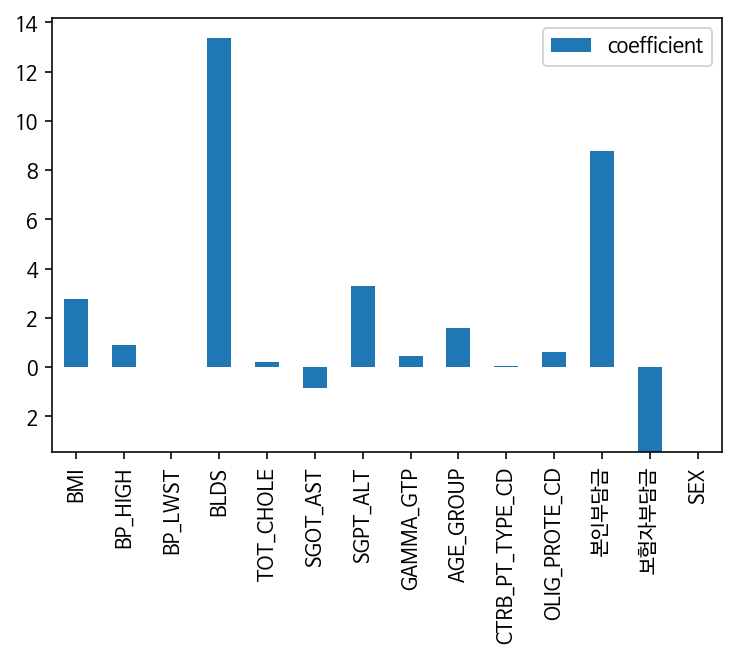

In [202]:
ax = logit_coef.plot(kind='bar')
ax.set_xticklabels(list(logit_coef['variable']))

### Random Forest

In [249]:
forest = RandomForestClassifier(n_estimators=20000, random_state=2, n_jobs=-1, max_depth = 10)
forest.fit(X_train, y_train)
print("훈련세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))
pred = forest.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
print("--Confusion Matrix--")
print(con_mat)
print("Accuracy : {:.3f}".format((con_mat[0,0]+con_mat[1,1])/con_mat.sum()))
print("Sensitivity : {:.3f}".format(con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])))

훈련세트 정확도 : 1.000
테스트세트 정확도 : 0.630
--Confusion Matrix--
[[2583  639]
 [1530 1115]]
Accuracy : 0.630
Sensitivity : 0.422


In [247]:
print("실제 환자 수 : ",y_test.sum())
print("예측한 환자 수 : ",pred.sum())

실제 환자 수 :  2645.0
예측한 환자 수 :  750.0


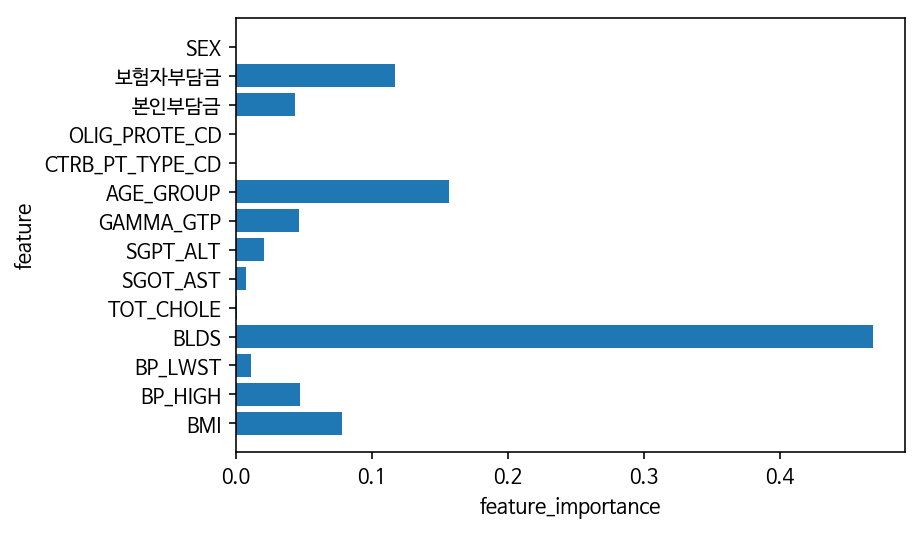

In [226]:
def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), logit_estimate["variable"])
    plt.xlabel("feature_importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)
plot_feature_importances_cancer(forest)

### Gradient Boosting

In [248]:
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=1500, learning_rate=0.01, max_depth=5)
gbrt.fit(X_train, y_train)
print("훈련세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))
pred = gbrt.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
print("--Confusion Matrix--")
print(con_mat)
print("Accuracy : {:.3f}".format((con_mat[0,0]+con_mat[1,1])/con_mat.sum()))
print("Sensitivity : {:.3f}".format(con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])))

훈련세트 정확도 : 0.717
테스트세트 정확도 : 0.634
--Confusion Matrix--
[[2598  624]
 [1526 1119]]
Accuracy : 0.634
Sensitivity : 0.423


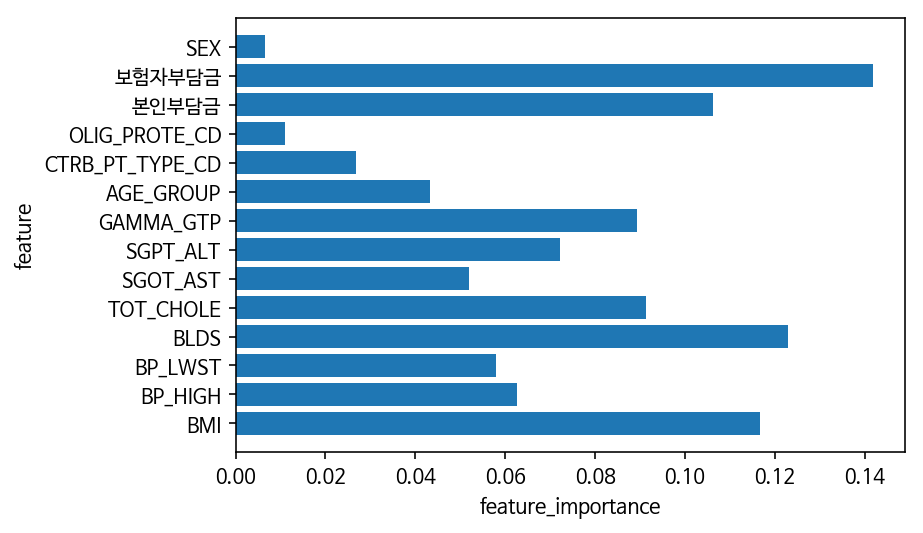

In [207]:
plot_feature_importances_cancer(gbrt)

### MLP(다층 신경망)

In [144]:
mlp = MLPClassifier(random_state=42, max_iter=3000, alpha=0.0001)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [145]:
print("훈련세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련세트 정확도 : 0.668
테스트세트 정확도 : 0.624


#### SVM(Support Vevtor Machine)

In [146]:
svc = SVC(C=1000,gamma=0.01, random_state=1, kernel='rbf')
svc.fit(X_train_MM, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
print("훈련세트 정확도 : {:.3f}".format(svc.score(X_train_MM, y_train)))
print("테스트세트 정확도 : {:.3f}".format(svc.score(X_test_MM, y_test)))
pred = svc.predict(X_test_MM)
con_mat = confusion_matrix(y_test, pred)
print("--Confusion Matrix--")
print(con_mat)
print("Accuracy : {:.3f}".format((con_mat[0,0]+con_mat[1,1])/con_mat.sum()))
print("Sensitivity : {:.3f}".format(con_mat[1,1]/(con_mat[0,1]+con_mat[1,1])))

훈련세트 정확도 : 0.636
테스트세트 정확도 : 0.605
--Confusion Matrix--
[[1918 1304]
 [1013 1632]]
Accuracy : 0.605
Sensitivity : 0.556
